# 6.4

### 2. Importing libraries and data.

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.
%matplotlib inline

In [3]:
# Making a path.
path = r'/Users/terencekeys/Downloads/Shawzz Folder/Data Analytics Immersion Files/Achievement 6 Data Sets/Chocolate Data Sets'

In [4]:
# Importing chocolate ratings cleaned 1 data set.
choc_ratg_clnd1 = pd.read_csv(os.path.join(path, 'Changed', 'chocolate_ratings_cleaned1.csv'), index_col = 0)

In [5]:
choc_ratg_clnd1

,REF,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating,Region,Num_of_Ingredients
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.0,"rich cocoa, fatty, bready",3.25,U.S.A.,3
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,3.0,"cocoa, vegetal, savory",3.50,U.S.A.,3
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.0,"cocoa, blackberry, full body",3.75,U.S.A.,3
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68.0,3.0,"chewy, off, rubbery",3.00,U.S.A.,3
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72.0,3.0,"fatty, earthy, moss, nutty,chalky",3.00,U.S.A.,3
...,...,...,...,...,...,...,...,...,...,...,...,...
2525,1205,Zotter,Austria,2014,Blend,Raw,80.0,4.0,"waxy, cloying, vegetal",2.75,Other,4
2526,1996,Zotter,Austria,2017,Colombia,"APROCAFA, Acandi",75.0,3.0,"strong nutty, marshmallow",3.75,Other,3
2527,2036,Zotter,Austria,2018,Blend,"Dry Aged, 30 yr Anniversary bar",75.0,3.0,"fatty, earthy, cocoa",3.00,Other,3
2528,2170,Zotter,Austria,2018,Congo,Mountains of the Moon,70.0,3.0,"fatty, mild nuts, mild fruit",3.25,Other,3


**A little bit of extra steps before getting into the task.**

In [6]:
# Checking data types.
choc_ratg_clnd1.dtypes

REF                                   int64
Company (Manufacturer)               object
Company Location                     object
Review Date                           int64
Country of Bean Origin               object
Specific Bean Origin or Bar Name     object
Cocoa Percent                       float64
Ingredients                          object
Most Memorable Characteristics       object
Rating                              float64
Region                               object
Num_of_Ingredients                    int64
dtype: object

In [7]:
# Checking for missing values.
choc_ratg_clnd1.isnull().sum()

REF                                 0
Company (Manufacturer)              0
Company Location                    0
Review Date                         0
Country of Bean Origin              0
Specific Bean Origin or Bar Name    0
Cocoa Percent                       0
Ingredients                         0
Most Memorable Characteristics      0
Rating                              0
Region                              0
Num_of_Ingredients                  0
dtype: int64

In [8]:
# Checking for duplicate values.
dups = choc_ratg_clnd1[choc_ratg_clnd1.duplicated()]
dups

,REF,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating,Region,Num_of_Ingredients


There are no duplicate values that are showing up.

### Extra steps of preprocessing.

<Axes: xlabel='REF', ylabel='Count'>

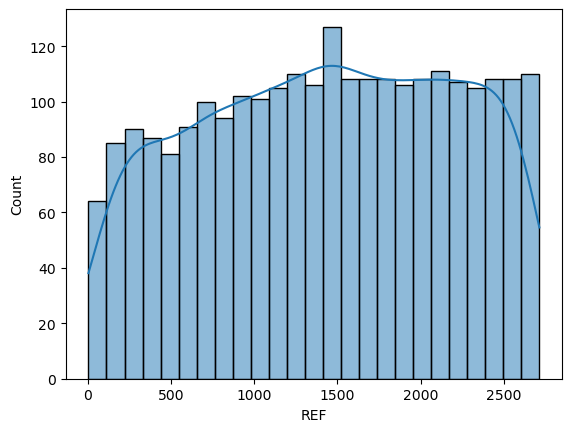

In [9]:
# Shows extreme/outlier values for 'REF'
sns.histplot(choc_ratg_clnd1['REF'], bins=25, kde = True)

In [10]:
# Checking for IQR (Interquartile Range) for 'REF'.
q1, q3 = np. percentile (choc_ratg_clnd1['REF'], [25, 75])
print(q1, q3)

802.0 2079.0


In [11]:
iqr = q3 - q1
print(iqr)

1277.0


<Axes: xlabel='Review Date', ylabel='Count'>

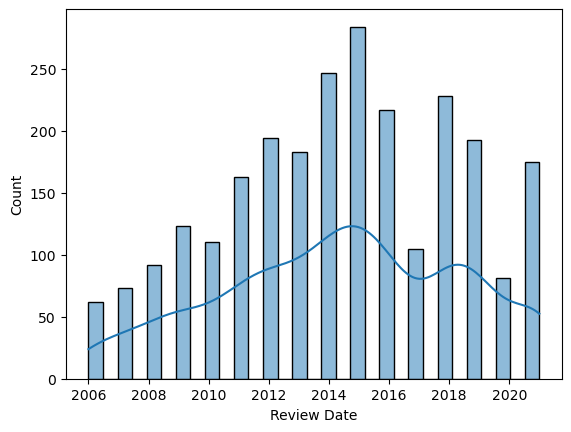

In [12]:
# Shows extreme/outlier values for 'Review Date'
sns.histplot(choc_ratg_clnd1['Review Date'], bins=31, kde = True)

<Axes: xlabel='Cocoa Percent', ylabel='Count'>

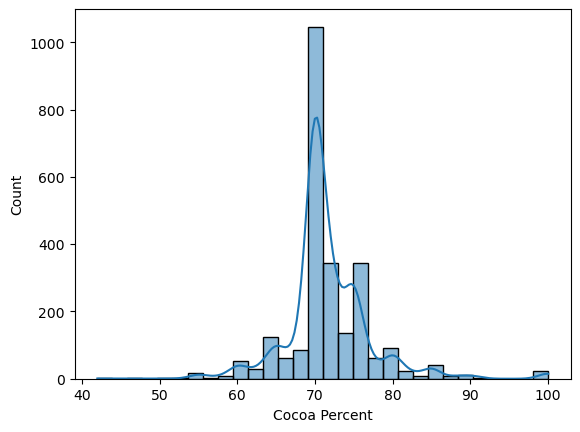

In [13]:
# Shows extreme/outlier values for 'Cocoa Percent'
sns.histplot(choc_ratg_clnd1['Cocoa Percent'], bins=30, kde = True) 

In [14]:
# Checking for IQR (Interquartile Range) for 'Cocoa Percent'.
q1, q3 = np. percentile (choc_ratg_clnd1['Cocoa Percent'], [25, 75])
print(q1, q3)

70.0 74.0


In [15]:
iqr = q3 - q1
print(iqr)

4.0


<Axes: xlabel='Rating', ylabel='Count'>

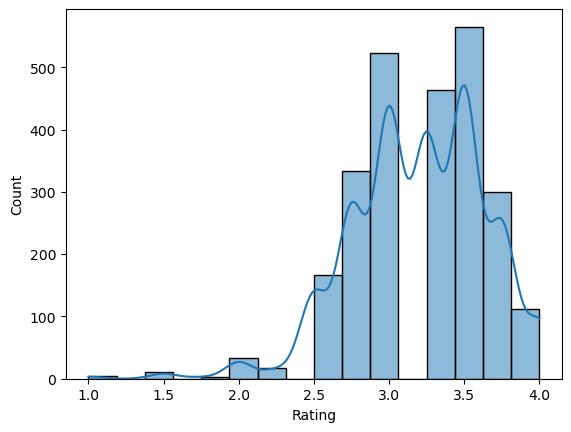

In [16]:
# Shows extreme/outlier values for 'Rating'
sns.histplot(choc_ratg_clnd1['Rating'], bins=16, kde = True) 

In [17]:
# Checking for IQR (Interquartile Range) for 'Rating'.
Rtngq1, q3 = np. percentile (choc_ratg_clnd1['Rating'], [25, 75])
print(Rtngq1, q3)

3.0 3.5


<Axes: xlabel='Num_of_Ingredients', ylabel='Count'>

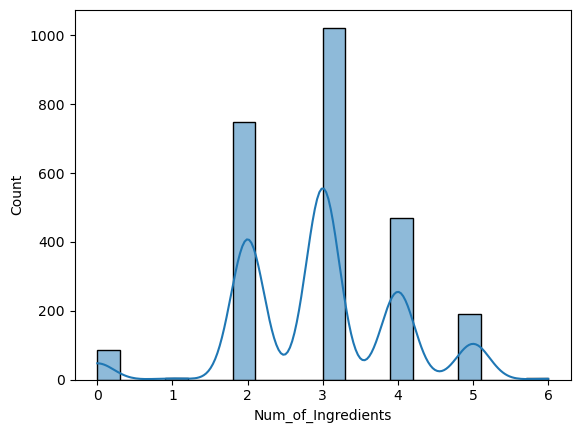

In [18]:
# Shows extreme/outlier values for 'Num_of_Ingredients'
sns.histplot(choc_ratg_clnd1['Num_of_Ingredients'], bins=20, kde = True) 

In [19]:
choc_ratg_clnd1.describe()

,REF,Review Date,Cocoa Percent,Rating,Num_of_Ingredients
count,2530.000000,2530.000000,2530.000000,2530.000000,2530.000000
mean,1429.800791,2014.374308,71.639723,3.196344,2.936759
std,757.648556,3.968267,5.616724,0.445321,1.055195
min,5.000000,2006.000000,42.000000,1.000000,0.000000
25%,802.000000,2012.000000,70.000000,3.000000,2.000000
50%,1454.000000,2015.000000,70.000000,3.250000,3.000000
75%,2079.000000,2018.000000,74.000000,3.500000,4.000000
max,2712.000000,2021.000000,100.000000,4.000000,6.000000


<Axes: xlabel='Cocoa Percent'>

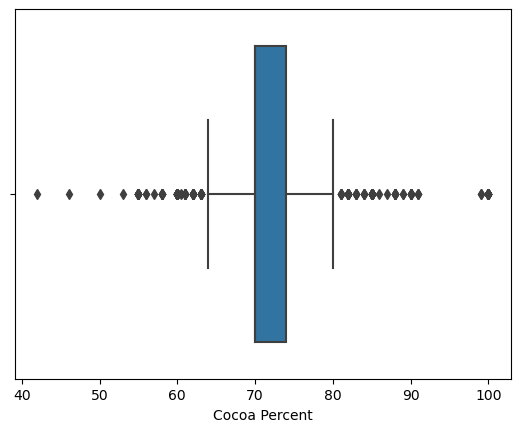

In [20]:
# Shows extreme/outlier values for 'Cocoa Percent' in a boxplot.
# Easier to see the outliers with a box plot.
sns.boxplot(x = choc_ratg_clnd1['Cocoa Percent'])

In [21]:
# Finding quartile 1 value.
choc_ratg_clnd1['Cocoa Percent'].quantile(0.25)

70.0

In [22]:
# Finding quartile 3 value.
choc_ratg_clnd1['Cocoa Percent'].quantile(0.75)

74.0

In [23]:
# Subtracting quartile 1 from 3 to get the IQR.
CP_Q1 = choc_ratg_clnd1['Cocoa Percent'].quantile(0.25)
CP_Q3 = choc_ratg_clnd1['Cocoa Percent'].quantile(0.75)
IQR = CP_Q3 - CP_Q1
IQR

4.0

In [24]:
# Finding lower and upper IQR limit.
CP_lower_lim = CP_Q1 - 1.5 * IQR
CP_upper_lim = CP_Q3 + 1.5 * IQR

In [25]:
CP_lower_lim

64.0

In [26]:
CP_upper_lim

80.0

In [27]:
CP_outliers_low = (choc_ratg_clnd1['Cocoa Percent'] < CP_lower_lim)

In [28]:
CP_outliers_up = (choc_ratg_clnd1['Cocoa Percent'] > CP_upper_lim)

In [29]:
# Dropping/removing the outliers.
len(choc_ratg_clnd1['Cocoa Percent']) - (len(choc_ratg_clnd1['Cocoa Percent'][CP_outliers_low]) + len(choc_ratg_clnd1['Cocoa Percent'][CP_outliers_up]))

2295

In [30]:
choc_ratg_clnd1['Cocoa Percent'][(CP_outliers_low | CP_outliers_up)]

8       63.0
19      63.0
29      63.0
31      63.0
37      60.0
        ... 
2496    85.0
2511    62.0
2517    90.0
2522    58.0
2523    62.0
Name: Cocoa Percent, Length: 235, dtype: float64

In [31]:
choc_ratg_clnd1['Cocoa Percent'][~(CP_outliers_low | CP_outliers_up)]

0       76.0
1       76.0
2       76.0
3       68.0
4       72.0
        ... 
2525    80.0
2526    75.0
2527    75.0
2528    70.0
2529    72.0
Name: Cocoa Percent, Length: 2295, dtype: float64

<Axes: xlabel='Num_of_Ingredients'>

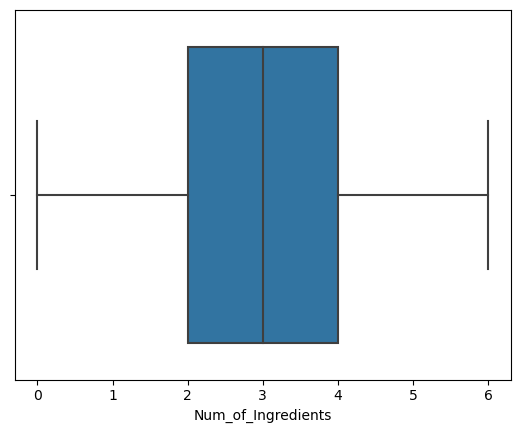

In [32]:
# Shows extreme/outlier values for 'Num_of_Ingredients' in a boxplot.
# Easier to see the outliers with a box plot.
sns.boxplot(x = choc_ratg_clnd1['Num_of_Ingredients'])

In [33]:
# Finding quartile 1 value.
choc_ratg_clnd1['Num_of_Ingredients'].quantile(0.25)

2.0

In [34]:
# Finding quartile 3 value.
choc_ratg_clnd1['Num_of_Ingredients'].quantile(0.75)

4.0

In [35]:
# Subtracting quartile 1 from 3 to get the IQR.
NI_Q1 = choc_ratg_clnd1['Num_of_Ingredients'].quantile(0.25)
NI_Q3 = choc_ratg_clnd1['Num_of_Ingredients'].quantile(0.75)
IQR = CP_Q3 - CP_Q1
IQR

4.0

In [36]:
# Finding lower and upper IQR limit.
NI_lower_lim = NI_Q1 - 1.5 * IQR
NI_upper_lim = NI_Q3 + 1.5 * IQR

In [37]:
NI_lower_lim

-4.0

In [38]:
NI_upper_lim

10.0

In [39]:
NI_outliers_low = (choc_ratg_clnd1['Num_of_Ingredients'] < NI_lower_lim)

In [40]:
NI_outliers_up = (choc_ratg_clnd1['Num_of_Ingredients'] > NI_upper_lim)

In [41]:
# Dropping/removing the outliers.
len(choc_ratg_clnd1['Num_of_Ingredients']) - (len(choc_ratg_clnd1['Num_of_Ingredients'][NI_outliers_low]) + len(choc_ratg_clnd1['Num_of_Ingredients'][NI_outliers_up]))

2530

In [42]:
choc_ratg_clnd1['Num_of_Ingredients'][(NI_outliers_low | NI_outliers_up)]

Series([], Name: Num_of_Ingredients, dtype: int64)

In [43]:
choc_ratg_clnd1['Num_of_Ingredients'][~(NI_outliers_low | NI_outliers_up)]

0       3
1       3
2       3
3       3
4       3
       ..
2525    4
2526    3
2527    3
2528    3
2529    3
Name: Num_of_Ingredients, Length: 2530, dtype: int64

In [44]:
choc_ratg_clnd1

,REF,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating,Region,Num_of_Ingredients
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.0,"rich cocoa, fatty, bready",3.25,U.S.A.,3
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,3.0,"cocoa, vegetal, savory",3.50,U.S.A.,3
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.0,"cocoa, blackberry, full body",3.75,U.S.A.,3
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68.0,3.0,"chewy, off, rubbery",3.00,U.S.A.,3
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72.0,3.0,"fatty, earthy, moss, nutty,chalky",3.00,U.S.A.,3
...,...,...,...,...,...,...,...,...,...,...,...,...
2525,1205,Zotter,Austria,2014,Blend,Raw,80.0,4.0,"waxy, cloying, vegetal",2.75,Other,4
2526,1996,Zotter,Austria,2017,Colombia,"APROCAFA, Acandi",75.0,3.0,"strong nutty, marshmallow",3.75,Other,3
2527,2036,Zotter,Austria,2018,Blend,"Dry Aged, 30 yr Anniversary bar",75.0,3.0,"fatty, earthy, cocoa",3.00,Other,3
2528,2170,Zotter,Austria,2018,Congo,Mountains of the Moon,70.0,3.0,"fatty, mild nuts, mild fruit",3.25,Other,3


In [45]:
# Exporting chocolate ratings cleaned 1.
choc_ratg_clnd1.to_csv(os.path.join(path, 'Changed', 'chocolate_ratings_cleaned1.csv'))

#### 3. Data cleaning.

I imported the chocolate ratings dataframe that had already been cleaned  and wrangled and all the extra little steps from the previous Exercise.

#### 4. Explore your data visually.

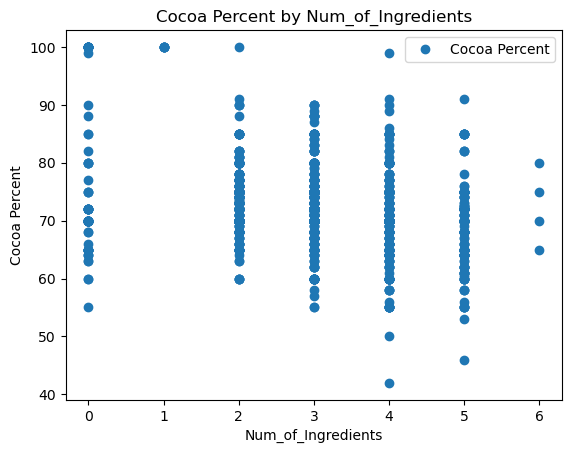

In [46]:
choc_ratg_clnd1.plot(x = 'Num_of_Ingredients', y='Cocoa Percent',style='o')
plt.title('Cocoa Percent by Num_of_Ingredients')
plt.xlabel('Num_of_Ingredients')
plt.ylabel('Cocoa Percent')
plt.show()

#### 5. State your hypothesis.

For the Num_of_Ingredients that is put into the chocolate, most chocolate bars will have 2 - 4 ingredients in them because too little (0 - 1) or too much (5 - 6) might give the chocolate bars a too sweet taste or too bitter taste.

#### 6. Reshape the variables into NumPy arrays.

In [47]:
# Reshaping the variables.
X = choc_ratg_clnd1['Cocoa Percent'].values.reshape(-1,1)
y = choc_ratg_clnd1['Num_of_Ingredients'].values.reshape(-1,1)

In [48]:
X

array([[76.],
       [76.],
       [76.],
       ...,
       [75.],
       [70.],
       [72.]])

In [49]:
y

array([[3],
       [3],
       [3],
       ...,
       [3],
       [3],
       [3]])

#### 7. Split the data into two sets: a training set and a test set.

In [50]:
# Spliting the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#### 8. Run a linear regression on the data.

In [51]:
# This is the regression object, which will be fit onto the training set.
regression = LinearRegression()

In [52]:
LinearRegression()

LinearRegression()

In [53]:
# Fit the regression object onto the training set.
regression.fit(X_train, y_train)

LinearRegression()

In [54]:
# Predict the values of y using X.
y_predicted = regression.predict(X_test)

#### 9. Create a plot that shows the regression line on the test set.

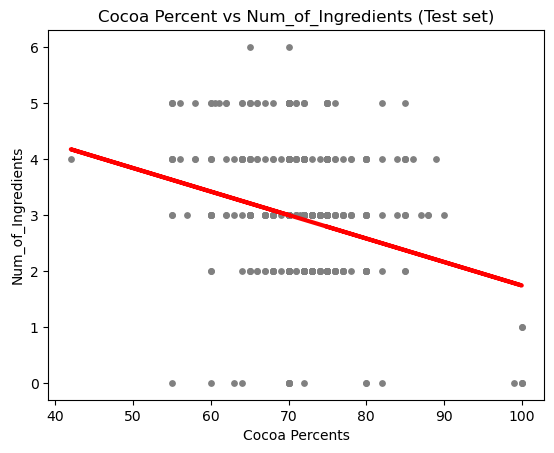

In [55]:
# Create a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Cocoa Percent vs Num_of_Ingredients (Test set)')
plot_test.xlabel('Num_of_Ingredients')
plot_test.ylabel('Cocoa Percents')
plot_test.show()

#### 10. Write your own interpretation of how well the line appears to fit the data.

First off, the trend line shows a downward slope. The lower the Num_of_Ingredients get the higher the percentage of cocoa gets. Which makes sense because the less ingredients are put into the mixture the higher the percentage of cocoa there is in the mixture.

Secondly, the trend line does not line up with the data points. The data points are all in rows following the number of ingredients. And does not show any trends compared to the trend line such as clustering along the line. 

#### 11. Check the model performance statistics—MSE and R2 score.

In [56]:
# Create objects that contain the model summary statistics.
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [57]:
# Print the model summary statistics. This is where you evaluate the performance of the model.
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.04193026]]
Mean squared error:  0.957691726935272
R2 score:  0.0400837800618038


The slope shows a negative slope the means a negative relationship. It shows a negative because as Cocoa Percent (X-variable) rises the Num_of_Ingredients (Y-variable) decreases.

The mean squared error shows how close a regression line is to a set of points, its accuracy. So, in my chart the regression line is pretty close to a set of data points.

The R2 score shows a number between 0 and 1, where values closer to 0 indicate a poor fit, and values closer to 1 indicate a good fit. In my case my R2 score is 0.04 which is closer to 0, which means that this type of chart is a poor fit for my data.

#### 12. Compare the predicted y values with the actual y values in a dataframe.

In [58]:
# Create a dataframe comparing the actual and predicted values of y.
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})

In [59]:
data

,Actual,Predicted
0,3,2.998154
1,2,2.998154
2,2,3.082014
3,3,3.333596
4,2,2.998154
...,...,...
754,3,2.914293
755,5,3.396491
756,4,3.207805
757,3,2.998154


#### Compare how the regression fits the training set

In [60]:
# Predicting X_train.
y_predicted_train = regression.predict(X_train)

In [61]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [62]:
# Print the model summary statistics. This is where you evaluate the performance of the model.
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.04193026]]
Mean squared error:  1.1063812005959555
R2 score:  0.04770468845785847


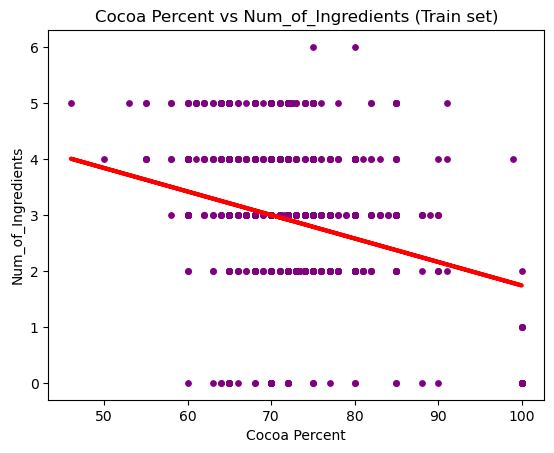

In [63]:
# Visualizing the training set results.
plot_test = plt
plot_test.scatter(X_train, y_train, color='purple', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Cocoa Percent vs Num_of_Ingredients (Train set)')
plot_test.xlabel('Cocoa Percent')
plot_test.ylabel('Num_of_Ingredients')
plot_test.show()